# Projet Intelligence Artificielle

*Professeur Younes Zerolis* 

## Integrants: 

 *Alejandro Gonzalez*
 
 *Carlos Cavalcante*
 
 *Salim last_name*
 
 *Stephane last_name*


Adress for dataset

https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/


Schéma
Pour la description étendue de la signification des champs, nous vous recommandons de consulter la notice officielle.

https://www.data.gouv.fr/fr/datasets/5cc1b94a634f4165e96436c1/
	


In [1]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import neighbors, preprocessing
data_2019 = pd.read_csv('full 2.csv',   encoding='utf8')
pd.set_option('display.max_columns', None)
data_2019.head(10)

from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors
from mpl_toolkits.mplot3d import Axes3D

/Users/carloscavalcante/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data_2019.shape

(2535791, 40)

In [3]:
data_2019.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,ancien_code_commune,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.535791e+06,2.506530e+06,1.510153e+06,2.507468e+06,4156.000000,221065.000000,54274.000000,5214.000000,9236.000000,1415.000000,4427.000000,609.000000,2.535791e+06,1.353332e+06,1.035415e+06,1.351615e+06,1.742774e+06,2.483256e+06,2.483256e+06
mean,1.199535e+00,9.715970e+05,7.270275e+02,5.197637e+04,52764.775987,60.976915,63.399269,73.177908,113.200195,86.964148,113.961373,94.380181,3.943330e-01,1.989685e+00,1.145561e+02,2.430351e+00,3.092637e+03,1.805240e+00,4.673679e+01
std,7.401537e+00,7.856914e+06,2.076794e+03,2.730261e+04,25811.932250,91.917658,58.867045,90.466541,523.073715,146.235137,452.971562,113.256244,8.086631e-01,9.438622e-01,9.956993e+02,2.083948e+00,1.364363e+04,4.802475e+00,3.896750e+00
min,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+03,1059.000000,0.140000,0.130000,0.850000,2.000000,1.000000,2.000000,0.890000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.314287e+01,-2.138505e+01
25%,1.000000e+00,6.000000e+04,8.000000e+00,3.123000e+04,35269.000000,33.700000,42.750000,38.105000,7.000000,30.510000,8.000000,23.790000,0.000000e+00,1.000000e+00,5.000000e+01,0.000000e+00,2.330000e+02,-8.134000e-03,4.508209e+01
50%,1.000000e+00,1.490000e+05,2.400000e+01,5.020000e+04,50524.000000,52.900000,60.600000,60.600000,24.000000,61.900000,27.000000,65.000000,0.000000e+00,2.000000e+00,7.500000e+01,3.000000e+00,6.100000e+02,2.229344e+00,4.733312e+01
75%,1.000000e+00,2.690000e+05,8.700000e+01,7.714400e+04,79035.000000,72.670000,76.040000,85.187500,68.000000,100.275000,73.000000,116.100000,1.000000e+00,3.000000e+00,1.050000e+02,4.000000e+00,1.885000e+03,3.530454e+00,4.880124e+01
max,6.940000e+02,2.086000e+09,9.999000e+03,9.749000e+04,91182.000000,9646.200000,8630.000000,3583.640000,17014.000000,3208.900000,11046.000000,1029.550000,1.750000e+02,4.000000e+00,3.129620e+05,6.700000e+01,1.662560e+06,5.582754e+01,5.108207e+01


In [4]:
# X = imputer.transform(data)
data_2019.dtypes

id_mutation                      object
date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                     float64


In [5]:
data_2019.isnull().sum()

id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   29261
adresse_numero                  1025638
adresse_suffixe                 2426362
adresse_nom_voie                  28354
adresse_code_voie                 28189
code_postal                       28323
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             2531635
ancien_nom_commune              2531635
id_parcelle                           0
ancien_id_parcelle              2534881
numero_volume                   2529165
lot1_numero                     1753172
lot1_surface_carrez             2314726
lot2_numero                     2372713
lot2_surface_carrez             2481517
lot3_numero                     2509709
lot3_surface_carrez             2530577
lot4_numero                     2526555


In [6]:
# removing columns from ancien_id_parcelle till nombre_lots
columns_removed=data_2019.iloc[:, 16:37]

In [7]:
data_2019=data_2019.drop(columns_removed, axis=1)

In [8]:
data_2019.dtypes

id_mutation             object
date_mutation           object
numero_disposition       int64
nature_mutation         object
valeur_fonciere        float64
adresse_numero         float64
adresse_suffixe         object
adresse_nom_voie        object
adresse_code_voie       object
code_postal            float64
code_commune            object
nom_commune             object
code_departement        object
ancien_code_commune    float64
ancien_nom_commune      object
id_parcelle             object
surface_terrain        float64
longitude              float64
latitude               float64
dtype: object

In [9]:
data_2019_explore=data_2019.drop(["id_mutation","date_mutation","numero_disposition","adresse_numero",
                          "adresse_suffixe","adresse_nom_voie","adresse_code_voie","code_departement","code_commune", 
                          "ancien_code_commune","ancien_nom_commune", "id_parcelle"], axis=1)

In [10]:
data_2019_explore.shape

(2535791, 7)

In [11]:
data_2019_explore.keys()

Index(['nature_mutation', 'valeur_fonciere', 'code_postal', 'nom_commune',
       'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [12]:
data_2019_explore.dtypes

nature_mutation     object
valeur_fonciere    float64
code_postal        float64
nom_commune         object
surface_terrain    float64
longitude          float64
latitude           float64
dtype: object

In [13]:
# Re-order columns
data_2019_explore = data_2019_explore[["nature_mutation","code_postal","nom_commune"
                                       ,"surface_terrain","longitude","latitude","valeur_fonciere"]]

In [14]:
data_2019_explore.head()

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude,valeur_fonciere
0,Vente,1000.0,Bourg-en-Bresse,NaN,5.209562,46.198840,37220.0
1,Vente,1000.0,Bourg-en-Bresse,NaN,5.219396,46.198766,185100.0
2,Vente,1000.0,Bourg-en-Bresse,NaN,5.219396,46.198766,185100.0
3,Vente,1160.0,Priay,940.0,5.282104,45.999566,209000.0
4,Vente,1370.0,Saint-Étienne-du-Bois,490.0,5.299929,46.293278,134900.0


## Removing Outliers (Valeurs aberrante) for Valeur Fonciere

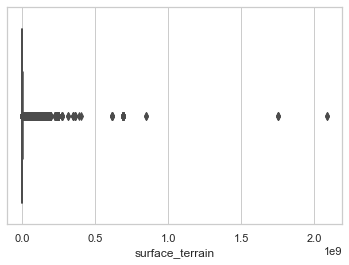

In [15]:
# sns.distplot(data['nature_mutation'])
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=data_2019_explore["valeur_fonciere"])


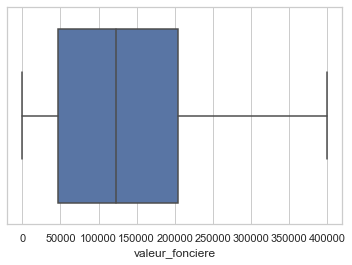

In [18]:
# Drop rows in column Valeur Fonciere which value are greater than 120 years
indexNames = data_2019_explore[data_2019_explore['valeur_fonciere'] > 400000].index
# Delete these row indexes from dataFrame
data_2019_explore.drop(indexNames , inplace=True)
ax = sns.boxplot(x=data_2019_explore["valeur_fonciere"])

## Outlier (valeur aberrante) for surface du terrain

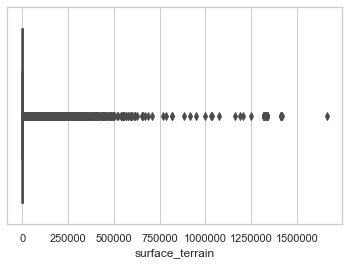

In [16]:
ax = sns.boxplot(x=data_2019_explore["surface_terrain"])  

## Filling with mean value

In [20]:
import math
surface_terrain_mean = data_2019_explore['surface_terrain'].mean()
surface_terrain_mean = math.floor(surface_terrain_mean)
print('The mean value in the normalized-losses feature is: {}'.format(str(surface_terrain_mean)))

The mean value in the normalized-losses feature is: 2612


In [22]:
data_2019_explore.update(data_2019_explore['surface_terrain'].fillna(surface_terrain_mean))

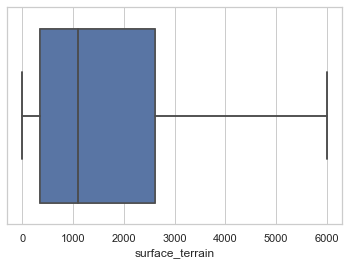

In [31]:
# Drop rows in column Valeur Fonciere which value are greater than 120 years
indexNames = data_2019_explore[data_2019_explore['surface_terrain'] > 6000].index
# Delete these row indexes from dataFrame
data_2019_explore.drop(indexNames , inplace=True)
ax = sns.boxplot(x=data_2019_explore["surface_terrain"])

ax = sns.boxplot(x=data_2019_explore["surface_terrain"])  


In [42]:
# Should see several red dots showing the valeur fonciere distributed, but does not work


# import pylab as pl
# %matplotlib inline
# pl.plot(data_2019_explore.iloc[:, 6:7], data_2019_explore.iloc[:, 3:4], 'ro')
# pl.xlabel('valeur_fonciere')
# pl.ylabel('surface_terrain')
# pl.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
data_tranformed = data_2019_explore.apply(LabelEncoder().fit_transform)

In [48]:
data=data_tranformed

In [49]:
data.head()

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude,valeur_fonciere
0,3,0,3243,2611,1050280,454046,21993
1,3,0,3243,2611,1050790,454028,54822
2,3,0,3243,2611,1050790,454028,54822
3,3,8,19515,939,1053624,423837,59238
4,3,28,23887,489,1054401,465650,43961


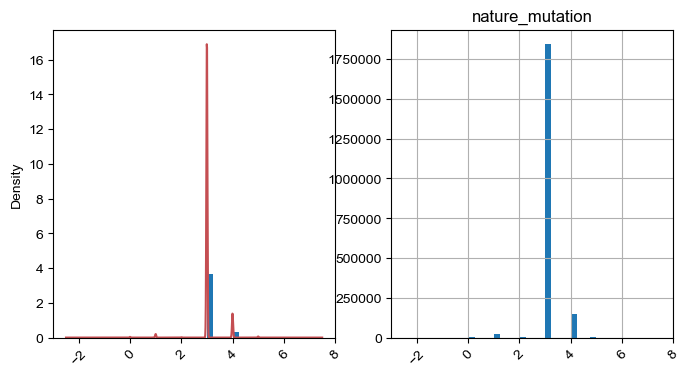

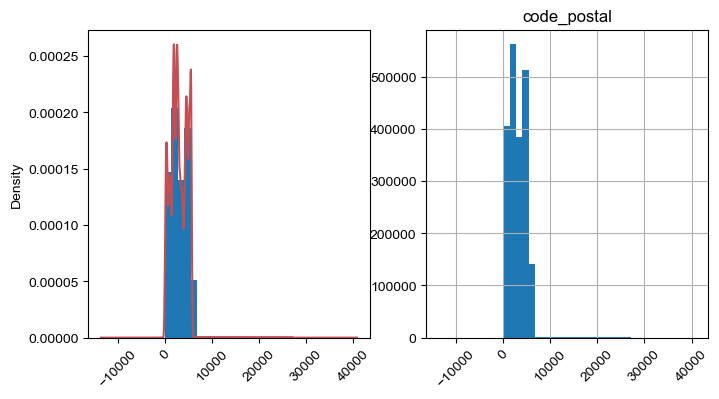

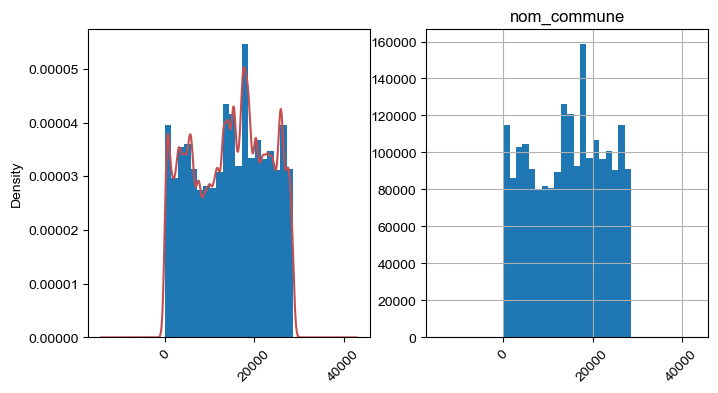

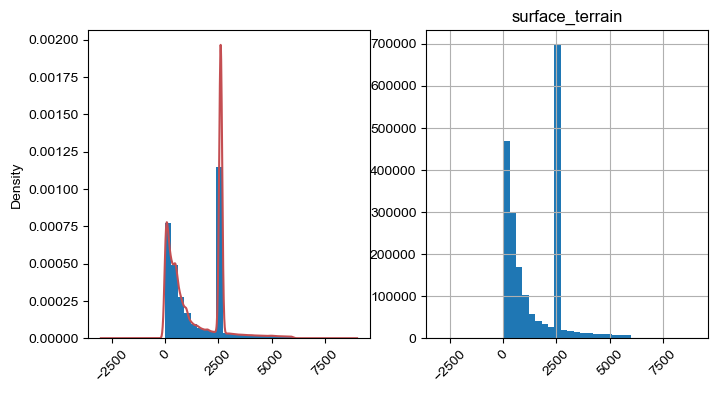

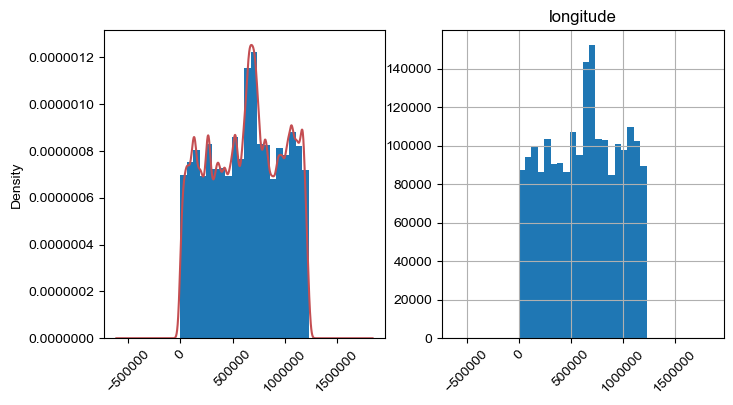

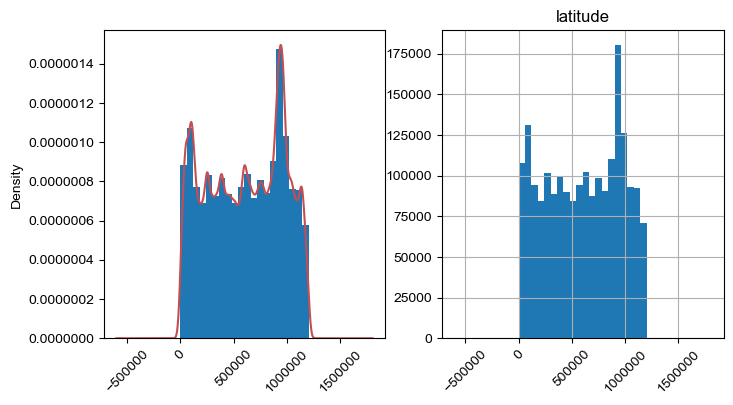

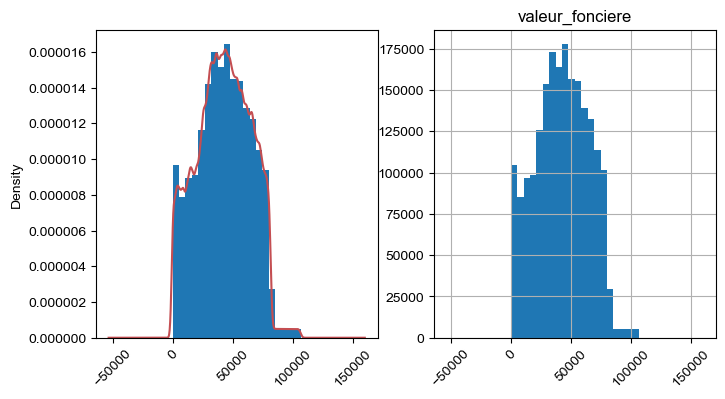

In [50]:
def dist_plots(df, **kwargs):
  """
  kwargs: rotate_kticks
  """
  for c in data.columns:
    with plt.style.context(('default')):

      f, ax =  plt.subplots(nrows=1, ncols=2, sharex=True, figsize = (8,4))
      data.loc[:,c].hist(bins = 20, density=False, ax = ax[1])
      data.loc[:,c].hist(bins = 20, density=True, ax = ax[0])
      data.loc[:,c].plot.kde( c = 'r', ax = ax[0])
      if 'rotate_xticks' in kwargs.keys():
        plt.setp( ax[0].xaxis.get_majorticklabels(), rotation=kwargs['rotate_xticks'] )
        plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=kwargs['rotate_xticks'] )
      plt.title(c)
    plt.show()

dist_plots(data, rotate_xticks = 45)

In [51]:
# Indicate missing values
data.isna

<bound method DataFrame.isna of          nature_mutation  code_postal  nom_commune  surface_terrain  \
0                      3            0         3243             2611   
1                      3            0         3243             2611   
2                      3            0         3243             2611   
3                      3            8        19515              939   
4                      3           28        23887              489   
...                  ...          ...          ...              ...   
2535710                3         4433        18437             2611   
2535727                3         4435        18439             2611   
2535728                3         4433        18437             2611   
2535731                3         4435        18439             2611   
2535732                3         4435        18439             2611   

         longitude  latitude  valeur_fonciere  
0          1050280    454046            21993  
1          1050790 

In [52]:
#Correlation Matrix
corr = data.corr()
corr

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude,valeur_fonciere
nature_mutation,1.000000,0.195129,0.002536,0.152953,0.000261,0.026876,0.218665
code_postal,0.195129,1.000000,-0.008167,0.091572,0.009736,0.313625,0.131184
nom_commune,0.002536,-0.008167,1.000000,0.012406,0.008805,-0.009552,-0.003737
surface_terrain,0.152953,0.091572,0.012406,1.000000,0.064465,-0.064747,0.011840
longitude,0.000261,0.009736,0.008805,0.064465,1.000000,-0.041064,-0.009623
latitude,0.026876,0.313625,-0.009552,-0.064747,-0.041064,1.000000,0.054289
valeur_fonciere,0.218665,0.131184,-0.003737,0.011840,-0.009623,0.054289,1.000000


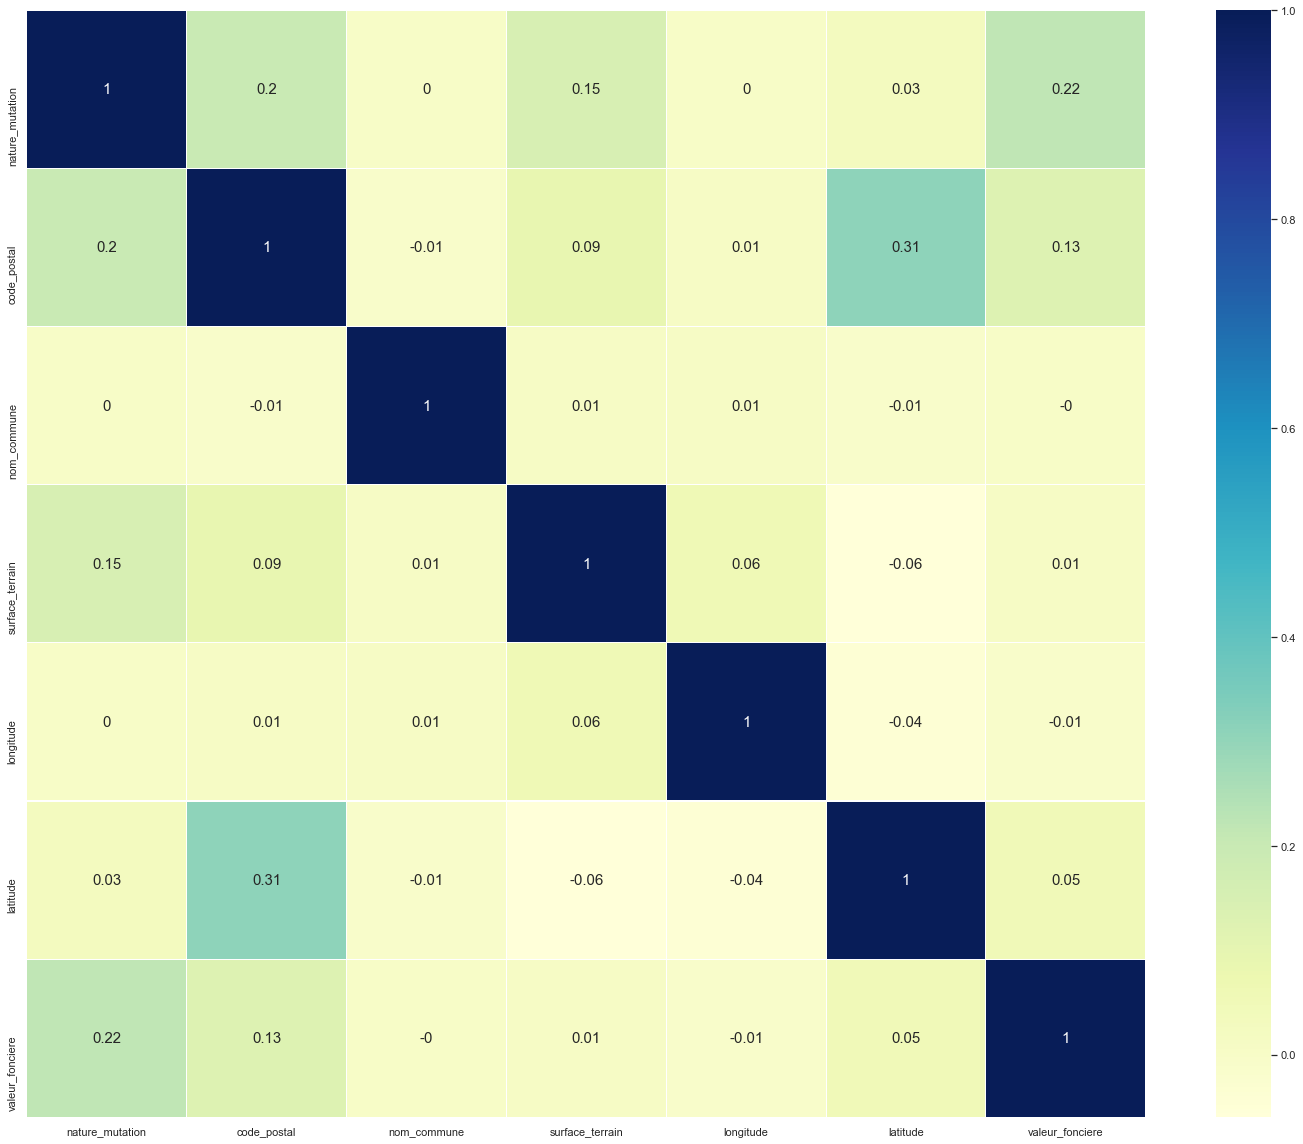

Text(0.5, 0.98, 'Maison France Attributes Correlation Heatmap')

In [53]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig, (ax) = plt.subplots(1, 1, figsize=(20,16))

# On utilise la matrice de correlation pour trouver les correlations entre toutes
sns.heatmap(data=data.corr().round(2), cmap='YlGnBu', annot=True, 
            annot_kws={"size":15},linewidths= .05)
# sns.heatmap(data=data1.corr().round(2))
plt.tight_layout()
plt.show()

fig.suptitle('Maison France Attributes Correlation Heatmap')

# Fetures selection

In [55]:
X = data.iloc[:, :-1]
y = data.iloc[:, 6:7]
print(X.shape)
print(y.shape)

(2027363, 6)
(2027363, 1)


## Target = Valeur Fonciere

In [56]:
y.head()

,valeur_fonciere
0,21993
1,54822
2,54822
3,59238
4,43961


## Features = nature_mutation,code_postal,nom_commune,surface_terrain, longitude, latitude

In [57]:
X.head()

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude
0,3,0,3243,2611,1050280,454046
1,3,0,3243,2611,1050790,454028
2,3,0,3243,2611,1050790,454028
3,3,8,19515,939,1053624,423837
4,3,28,23887,489,1054401,465650


In [61]:
data_code_postal = data.dropna()

In [62]:
data_code_postal

,nature_mutation,code_postal,nom_commune,surface_terrain,longitude,latitude,valeur_fonciere
0,3,0,3243,2611,1050280,454046,21993
1,3,0,3243,2611,1050790,454028,54822
2,3,0,3243,2611,1050790,454028,54822
3,3,8,19515,939,1053624,423837,59238
4,3,28,23887,489,1054401,465650,43961
...,...,...,...,...,...,...,...
2535710,3,4433,18437,2611,680737,945917,33382
2535727,3,4435,18439,2611,682076,942579,72103
2535728,3,4433,18437,2611,682402,946027,72645
2535731,3,4435,18439,2611,685143,941842,65316


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

In [64]:
# Décomposer les données en training/testing  
k_neighbors = 15
classifc = neighbors.KNeighborsClassifier(k_neighbors,weights='uniform')

In [65]:
# Décomposer les targets en training/testing  
classifc.fit(X_train, y_train)

/Users/carloscavalcante/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [66]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1419154, 6) (608209, 6) (1419154, 1) (608209, 1)


In [67]:
regression = linear_model.LinearRegression()
 
# Faire apprendre le model en utilisant les training set
classifc.fit(X_train, y_train)

/Users/carloscavalcante/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [68]:
Z = classifc.predict(X_train)
Z.shape

(1419154,)

In [69]:
accuracy = classifc.score(X_train, y_train)
print('The accuracy of this predict model is: {:.3f}'.format(accuracy))

The accuracy of this predict model is: 0.278


# Training and Testing (80% - 20%), Seed = 44

In [70]:
from numpy import nan
from sklearn.impute import SimpleImputer

In [71]:
imp = SimpleImputer(strategy = 'mean')
X = imp.fit_transform(X)
X

array([[3.00000e+00, 0.00000e+00, 3.24300e+03, 2.61100e+03, 1.05028e+06,
        4.54046e+05],
       [3.00000e+00, 0.00000e+00, 3.24300e+03, 2.61100e+03, 1.05079e+06,
        4.54028e+05],
       [3.00000e+00, 0.00000e+00, 3.24300e+03, 2.61100e+03, 1.05079e+06,
        4.54028e+05],
       ...,
       [3.00000e+00, 4.43300e+03, 1.84370e+04, 2.61100e+03, 6.82402e+05,
        9.46027e+05],
       [3.00000e+00, 4.43500e+03, 1.84390e+04, 2.61100e+03, 6.85143e+05,
        9.41842e+05],
       [3.00000e+00, 4.43500e+03, 1.84390e+04, 2.61100e+03, 6.86720e+05,
        9.40527e+05]])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_tranformed.iloc[:, :-1], 
                                                    data_tranformed.iloc[:, 6:7],
                                                    test_size = 0.2, random_state = 44)

In [73]:
# Printing the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1621890, 6) (405473, 6) (1621890, 1) (405473, 1)


In [80]:
from sklearn.linear_model import LinearRegression

In [87]:
from sklearn.model_selection import cross_validate

# Create Training set
train = data.sample(frac = 0.75 , random_state = 1 )
# Print Shape du Training
print('Training Shape:',train.shape)

Training Shape: (1520522, 7)


In [88]:
test = data.loc[~data.index.isin(train.index)]
print('shape test:', test.shape)

shape test: (506841, 7)


In [89]:
columns = ['nature_mutation','code_postal','nom_commune','longitude','latitude']
target = 'valeur_fonciere'

In [91]:
# Training
X_train = train[columns]
y_train = train[target]
# Testing
X_test =  test[columns]
y_test = test[target]

## Training

In [92]:
model_lr = LinearRegression()
model_lr.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Coeficient

In [93]:
print('Coeficients du Modele: ', model_lr.coef_)

Coeficients du Modele:  [ 1.15691007e+04  8.40900673e-01 -7.63224949e-03 -6.55903001e-04
  1.38376024e-03]


## Prediction

In [94]:
p = model_lr.predict(X_test)
print('Predicteurs')
print(p[:10])
print('Vrais Valeurs')
print(y_test[:10])

Predicteurs
[39089.32511229 39020.81000443 39020.8516944  39018.80321661
 15884.31555484 39087.0804952  39003.35942159 39009.64010242
 39087.01126529 39086.46252392]
Vrais Valeurs
1     54822
24    10808
27    10808
32    14599
65     7073
67    63763
68    45043
70    33414
83    43575
87    37109
Name: valeur_fonciere, dtype: int64


# Afficher les Erreurs RSS

In [95]:
err = abs(p - y_test)
print('Residual Sum of Squares: {:.2f}'.format(np.sqrt(np.mean(err**2))))

Residual Sum of Squares: 21410.65


# Coeficient Determination R2 Squared

In [96]:
from sklearn.metrics import r2_score
print('R2 Score ou Coeficient de Determination: {:.1f}%'.format(round(r2_score(y_test, p)*100)))

R2 Score ou Coeficient de Determination: 6.0%
